## Regression

1. What is Simple Linear Regression?

->

Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: a dependent variable and an independent variable.

It assumes a linear relationship between the two variables, meaning that the change in the dependent variable is proportional to the change in the independent variable.

The goal is to find the best-fitting straight line through the data points that minimizes the sum of squared differences between the observed and predicted values.




2. What are the key assumptions of Simple Linear Regression?

->

The key assumptions of Simple Linear Regression are:

    1. Linearity: The relationship between the independent and dependent variables is linear.

    2. Independence: The observations are independent of each other.

    3. Homoscedasticity: The variance of the residuals is constant across all levels of the independent variable.

    4. Normality: The residuals are normally distributed.




3. What is heteroscedasticity, and why is it important to address in regression models?

->

Heteroscedasticity refers to the situation where the variance of the residuals (the differences between observed and predicted values) is not constant across all levels of the independent variable(s).

It is important to address in regression models because it violates the assumption of homoscedasticity, which can lead to biased standard errors, unreliable hypothesis tests, and inaccurate confidence intervals.

This means that the model's predictions might be less precise for certain ranges of the independent variables. Addressing heteroscedasticity can involve data transformations or using robust regression methods.




4. What is Multiple Linear Regression?

->

Multiple Linear Regression is an extension of simple linear regression that models the linear relationship between a continuous dependent variable and two or more independent variables.

It aims to find a linear equation that best predicts the dependent variable based on the values of the multiple independent variables.

Each independent variable has its own coefficient, representing the change in the dependent variable for a one-unit change in that independent variable, while holding other independent variables constant.





5. What is polynomial regression, and how does it differ from linear regression?

->

Polynomial regression is a form of regression analysis in which the relationship between the independent variable `x` and the dependent variable `y` is modeled as an nth degree polynomial in `x`.

It differs from linear regression in that linear regression models a linear relationship (a straight line), while polynomial regression models a curvilinear relationship (a curve).

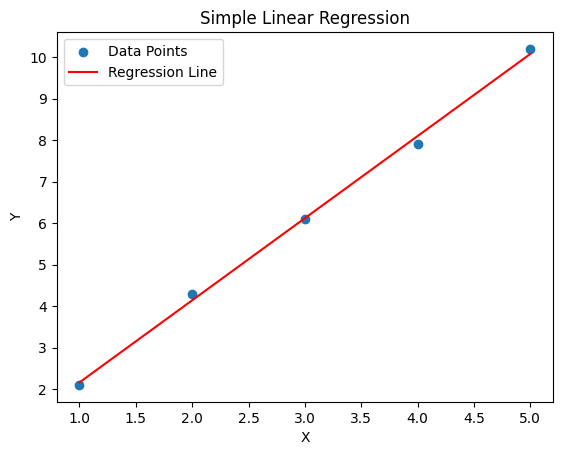

Intercept: 0.17999999999999794
Coefficient: 1.9800000000000004


In [1]:
'''
6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

(Include your Python code and output in the code box below.)
->
'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict the values
Y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, Y, label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

In [2]:
'''
7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

(Include your Python code and output in the code box below.)
->
'''

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {'Area': [1200, 1500, 1800, 2000],
        'Rooms': [2, 3, 3, 4],
        'Price': [250000, 300000, 320000, 370000]}

df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
Y = df['Price']

# Create a Multiple Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Print the model's coefficients
print("Multiple Linear Regression Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

print("\nMulticollinearity Check (VIF):")
print(vif_data)

Multiple Linear Regression Model Coefficients:
Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Multicollinearity Check (VIF):
  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


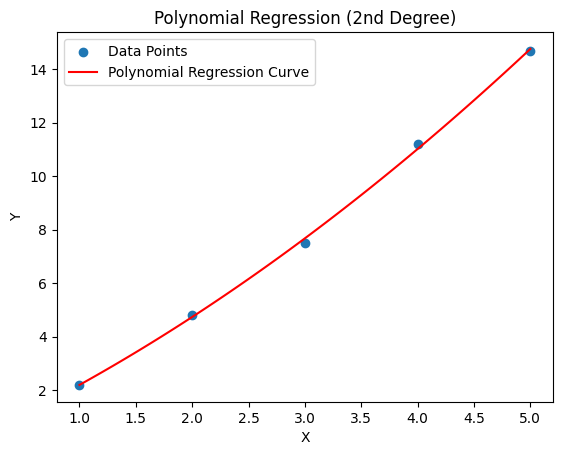

Polynomial Regression Model Coefficients:
Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


In [3]:
'''
8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

(Include your Python code and output in the code box below.)
->
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, Y)

# Predict the values for plotting the curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

# Plot the original data points and the polynomial curve
plt.scatter(X, Y, label='Data Points')
plt.plot(X_plot, Y_plot, color='red', label='Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (2nd Degree)')
plt.legend()
plt.show()

# Print the model's coefficients
print("Polynomial Regression Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

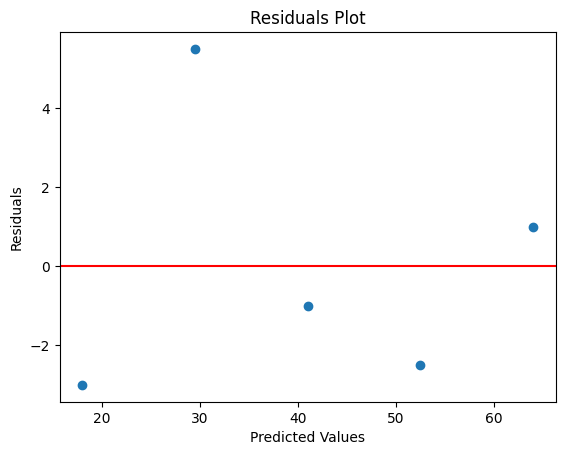

Assess heteroscedasticity by examining the spread of residuals in the plot.


In [4]:
'''
9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

(Include your Python code and output in the code box below.)
->
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict the values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create residuals plot
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Assess heteroscedasticity (by visual inspection of the plot)
print("Assess heteroscedasticity by examining the spread of residuals in the plot.")

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust
model.

->

Here are the steps I would take to address heteroscedasticity and multicollinearity in a regression model for predicting house prices:

Addressing Heteroscedasticity:

1.  Identify the pattern:

I would examine the residuals plot to understand the nature of heteroscedasticity. Is the variance increasing with the predicted values, or is there another pattern?


2.  Data Transformations:

       Log Transformation: If the dependent variable (price) or the independent variables (area, rooms) show a skewed distribution or increasing variance, applying a log transformation can often stabilize the variance.

       Square Root Transformation: Similar to log transformation, this can be useful for variables with non-normal distributions and increasing variance.

       Box-Cox Transformation: This transformation can help find the optimal power transformation for the dependent variable to achieve homoscedasticity.

3.  Weighted Least Squares (WLS):

If the form of heteroscedasticity is known or can be estimated, WLS can be used. This method assigns lower weights to observations with higher variance, effectively downweighting their influence on the model.

4.  Robust Standard Errors:

Instead of transforming the data or using WLS, I could use robust standard errors. These standard errors are less sensitive to violations of the homoscedasticity assumption and provide more reliable inference.



Addressing Multicollinearity:

1.  Identify Multicollinearity:

I would calculate the Variance Inflation Factor (VIF) for each independent variable. A high VIF (typically above 5 or 10) indicates significant multicollinearity. I would also examine the correlation matrix of the independent variables.


2.  Remove Highly Correlated Variables:

If two or more independent variables are highly correlated, I would consider removing one of them. The decision of which variable to remove would depend on domain knowledge, the variable's importance, and its VIF.


3.  Combine Correlated Variables:

Instead of removing variables, I could create a new variable that combines the correlated variables. For example, I could create a "size" variable by combining area and number of rooms if they are highly correlated.


4.  Principal Component Analysis (PCA):

PCA is a dimensionality reduction technique that can be used to create a new set of uncorrelated variables (principal components) from the original correlated variables. These principal components can then be used in the regression model.


5.  Regularization Techniques (Lasso and Ridge Regression):

These techniques add a penalty term to the regression objective function that shrinks the coefficients of correlated variables towards zero. Lasso can even set the coefficients of some variables to exactly zero, effectively performing variable selection.


Ensuring a Robust Model:

1.  Model Evaluation: After addressing heteroscedasticity and multicollinearity, I would re-evaluate the model's performance using metrics like R-squared, adjusted R-squared, RMSE, and residual plots.

2.  Cross-Validation: I would use cross-validation techniques to ensure that the model generalizes well to new data and is not overfitting.

3.  Domain Knowledge: I would use my knowledge of the real estate market to interpret the model's results and ensure that the coefficients and predictions are reasonable.

4.  Iterative Process: Addressing these issues is often an iterative process. I might need to try different approaches and evaluate their impact on the model's performance.